<a href="https://colab.research.google.com/github/Joaovitron999/Classificacao-IA-Python/blob/main/Atividade_V_Classifica%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> Nomes: </h1>

- Denis Mendes Coutinho
- Rikson Pablo
- João Vitor Fonseca
- José Flávio Lopes

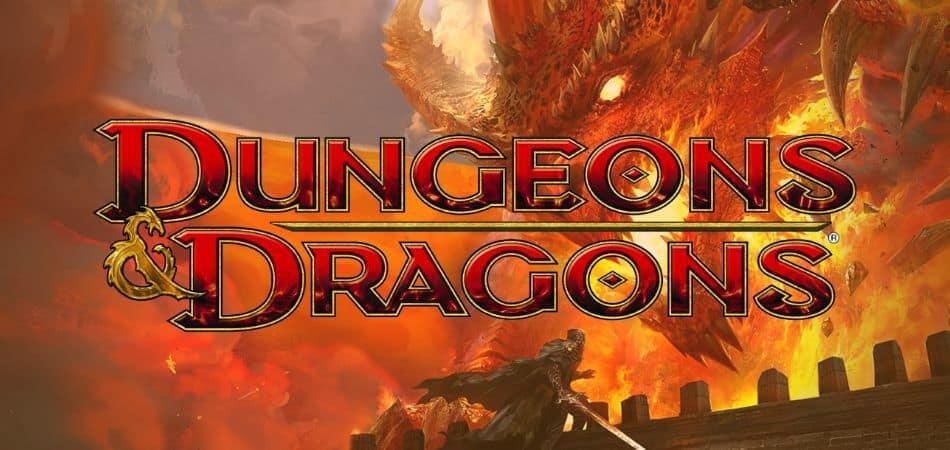

In [ ]:
import copy
import numpy as np
import pandas as pd

In [ ]:
DataFrame = pd.read_csv("https://raw.githubusercontent.com/joseflaviol/datasets/main/dnd_stats.csv")
DataFrame = DataFrame.sample(frac = 1, random_state = 1).reset_index()
DataFrame.pop('index')
DataFrame.tail()

,race,height,weight,speed,strength,dexterity,constitution,intelligence,wisdom,charisma
9995,elf,61,125,30,16,10,11,16,15,10
9996,human,64,166,30,17,12,12,16,10,16
9997,dragonborn,78,259,30,12,12,15,12,11,14
9998,half.elf,69,182,30,12,15,10,12,8,18
9999,dragonborn,76,225,30,17,16,11,16,13,15


In [ ]:
X = DataFrame.iloc[:, 1:10].values
y = DataFrame.iloc[:, 0].values

In [ ]:
from sklearn.preprocessing import StandardScaler # importando classe utilizada para escalonar os atributos

scaler = StandardScaler() # criando instância da classe
X = scaler.fit_transform(X)
X

array([[ 0.25616522, -0.01264251,  0.70991941, ...,  0.42318019,
        -1.18108254, -0.96487027],
       [-1.62601864, -1.56458923, -1.4086106 , ...,  1.44117439,
        -1.18108254, -1.30105029],
       [ 0.85846406,  0.28017763,  0.70991941, ..., -0.93414541,
         0.20171569,  1.72456988],
       ...,
       [ 1.38547554,  1.64179126,  0.70991941, ..., -0.25548261,
        -0.48968342,  0.3798498 ],
       [ 0.70788935,  0.51443374,  0.70991941, ..., -0.25548261,
        -1.5267821 ,  1.72456988],
       [ 1.23490083,  1.14399703,  0.70991941, ...,  1.10184299,
         0.20171569,  0.71602982]])

In [ ]:
from sklearn.model_selection import train_test_split

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.3, random_state = 123)

Dividindo saidas

In [ ]:
subs = np.array_split(X_treino, 5)
subsSaidas = np.array_split(y_treino,5)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

arraySVC = [
    SVC(kernel = 'linear', C = 1),
    SVC(kernel = 'linear', C = 2),
    SVC(kernel = 'linear', C = 3),
    SVC(kernel = 'linear', C = 4),

    SVC(kernel = 'poly', C = 1),
    SVC(kernel = 'poly', C = 2),
    SVC(kernel = 'poly', C = 3),
    SVC(kernel = 'poly', C = 4),
    
    SVC(kernel = 'rbf', C = 1),
    SVC(kernel = 'rbf', C = 2),
    SVC(kernel = 'rbf', C = 3),
    SVC(kernel = 'rbf', C = 4),

    SVC(kernel = 'sigmoid', C = 1),
    SVC(kernel = 'sigmoid', C = 2),
    SVC(kernel = 'sigmoid', C = 3),
]

arrayDT = [
    DecisionTreeClassifier(criterion = 'gini', splitter = 'best'),
    DecisionTreeClassifier(criterion = 'gini', max_features = 'sqrt', splitter = 'best'),
    DecisionTreeClassifier(criterion = 'gini', max_features = 'log2', splitter = 'best'),
    DecisionTreeClassifier(criterion = 'gini', max_features = 'log2', splitter = 'random'),
    DecisionTreeClassifier(criterion = 'gini', max_features = 'sqrt', splitter = 'random'),

    DecisionTreeClassifier(criterion = 'entropy', splitter = 'best'),
    DecisionTreeClassifier(criterion = 'entropy', max_features = 'sqrt', splitter = 'best'),
    DecisionTreeClassifier(criterion = 'entropy', max_features = 'log2', splitter = 'best'),
    DecisionTreeClassifier(criterion = 'entropy', max_features = 'log2', splitter = 'random'),
    DecisionTreeClassifier(criterion = 'entropy', max_features = 'sqrt', splitter = 'random'),

    DecisionTreeClassifier(criterion = 'gini', splitter = 'best',min_samples_split = 3),
    DecisionTreeClassifier(criterion = 'entropy', max_features = 'sqrt',min_samples_split = 3, splitter = 'best'),
    DecisionTreeClassifier(criterion = 'gini', max_features = 'log2',min_samples_split = 3,  splitter = 'best'),
    DecisionTreeClassifier(criterion = 'entropy', max_features = 'log2',min_samples_split = 3,  splitter = 'random'),
    DecisionTreeClassifier(criterion = 'gini', max_features = 'sqrt',min_samples_split = 3,  splitter = 'random')
]

arrayRF = [
    RandomForestClassifier(criterion = 'gini'),
    RandomForestClassifier(criterion = 'gini', max_features = 'sqrt', class_weight = 'balanced'),
    RandomForestClassifier(criterion = 'gini', max_features = 'log2', class_weight = 'balanced'),
    RandomForestClassifier(criterion = 'gini', max_features = 'log2', class_weight = 'balanced_subsample'),
    RandomForestClassifier(criterion = 'gini', max_features = 'sqrt', class_weight = 'balanced_subsample'),

    RandomForestClassifier(criterion = 'entropy'),
    RandomForestClassifier(criterion = 'entropy', max_features = 'sqrt', class_weight = 'balanced'),
    RandomForestClassifier(criterion = 'entropy', max_features = 'log2', class_weight = 'balanced'),
    RandomForestClassifier(criterion = 'entropy', max_features = 'log2', class_weight = 'balanced_subsample'),
    RandomForestClassifier(criterion = 'entropy', max_features = 'sqrt', class_weight = 'balanced_subsample'),

    RandomForestClassifier(criterion = 'gini', bootstrap = False),
    RandomForestClassifier(criterion = 'entropy', bootstrap = False),
    RandomForestClassifier(criterion = 'gini', bootstrap = False, max_features = 'log2', class_weight = 'balanced'),
    RandomForestClassifier(criterion = 'entropy', bootstrap = False, max_features = 'log2', class_weight = 'balanced_subsample'),
    RandomForestClassifier(criterion = 'gini', bootstrap = False, max_features = 'sqrt', class_weight = 'balanced_subsample'),
]

arrayXGB = [
    GradientBoostingClassifier(n_estimators = 93),
    GradientBoostingClassifier(n_estimators = 94),
    GradientBoostingClassifier(n_estimators = 95),
    GradientBoostingClassifier(n_estimators = 96),
    GradientBoostingClassifier(n_estimators = 97),

    GradientBoostingClassifier(n_estimators = 98),
    GradientBoostingClassifier(n_estimators = 99),
    GradientBoostingClassifier(n_estimators = 100),
    GradientBoostingClassifier(n_estimators = 101),
    GradientBoostingClassifier(n_estimators = 102),

    GradientBoostingClassifier(n_estimators = 103),
    GradientBoostingClassifier(n_estimators = 104),
    GradientBoostingClassifier(n_estimators = 105),
    GradientBoostingClassifier(n_estimators = 106),
    GradientBoostingClassifier(n_estimators = 107),
]

arrayMLP = [
    MLPClassifier(hidden_layer_sizes=(20,), solver = 'lbfgs', activation = 'identity', max_iter = 10000),
    MLPClassifier(hidden_layer_sizes=(20,),solver = 'lbfgs', activation = 'logistic', max_iter = 10000),
    MLPClassifier(hidden_layer_sizes=(20,),solver = 'lbfgs', activation = 'tanh', max_iter = 10000),
    MLPClassifier(hidden_layer_sizes=(20,),solver = 'lbfgs', activation = 'relu', max_iter = 10000),

    MLPClassifier(hidden_layer_sizes=(20,),solver = 'sgd', learning_rate = 'invscaling', activation = 'identity', max_iter = 10000),
    MLPClassifier(hidden_layer_sizes=(20,),solver = 'sgd', activation = 'identity', max_iter = 10000),
    MLPClassifier(hidden_layer_sizes=(20,),solver = 'sgd', activation = 'logistic', max_iter = 10000),
    MLPClassifier(hidden_layer_sizes=(20,),solver = 'sgd', activation = 'tanh', max_iter = 10000),
    MLPClassifier(hidden_layer_sizes=(20,),solver = 'sgd', activation = 'relu', max_iter = 10000),
    MLPClassifier(hidden_layer_sizes=(20,),solver = 'sgd', learning_rate = 'invscaling', activation = 'logistic', max_iter = 10000),
    MLPClassifier(hidden_layer_sizes=(20,),solver = 'sgd', learning_rate = 'invscaling', activation = 'tanh', max_iter = 10000),

    MLPClassifier(hidden_layer_sizes=(20,),solver = 'adam', activation = 'identity', max_iter = 10000),
    MLPClassifier(hidden_layer_sizes=(20,),solver = 'adam', activation = 'logistic', max_iter = 10000),
    MLPClassifier(hidden_layer_sizes=(20,),solver = 'adam', activation = 'tanh', max_iter = 10000),
    MLPClassifier(hidden_layer_sizes=(20,),solver = 'adam', activation = 'relu', max_iter = 10000)
]

In [ ]:
modelos = []

for i in range(len(subs)):

    for j in range(15): 
    
        knn = KNeighborsClassifier(n_neighbors = j + 3)
        knn.fit(subs[i], subsSaidas[i])
        
        modelos.append( [knn, knn.score(X_teste, y_teste), 'sub ' + str(i + 1)] )

        svm = copy.copy(arraySVC[j])
        svm.fit(subs[i], subsSaidas[i])
        modelos.append( [svm, svm.score(X_teste, y_teste), 'sub ' + str(i + 1)] )

        dt = copy.copy(arrayDT[j])
        dt.fit(subs[i], subsSaidas[i])
        modelos.append( [dt, dt.score(X_teste, y_teste), 'sub ' + str(i + 1)] )

        xgb = copy.copy(arrayXGB[j])
        xgb.fit(subs[i], subsSaidas[i])
        modelos.append( [xgb, xgb.score(X_teste, y_teste), 'sub' + str(i + 1)] )

        rf = copy.copy(arrayRF[j])
        rf.fit(subs[i], subsSaidas[i])
        modelos.append( [rf, rf.score(X_teste, y_teste), 'sub' + str(i + 1)] )

        mlp = copy.copy(arrayMLP[j])
        mlp.fit(subs[i], subsSaidas[i])
        modelos.append( [mlp, mlp.score(X_teste, y_teste), 'sub' + str(i + 1)] )

   

In [ ]:
len(modelos)

450

In [ ]:
for i in range(1, len(modelos)):
    chave = modelos[i]
    j = i - 1
    while j > -1 and chave[1] > modelos[j][1]:
        modelos[j + 1] = modelos[j]
        j = j - 1
    modelos[j + 1] = chave


arrayCol = ["modelo","acurácia","subconjunto de treino"]
arrayData = []
for i in range(10):
    linha = [str(modelos[i][0]),modelos[i][1],modelos[i][2]]
    arrayData.append(linha)
df = pd.DataFrame(data=arrayData,columns=arrayCol)
df

,modelo,acurácia,subconjunto de treino
0,GradientBoostingClassifier(n_estimators=93),0.666000,sub4
1,GradientBoostingClassifier(n_estimators=94),0.664333,sub4
2,GradientBoostingClassifier(n_estimators=102),0.664333,sub4
3,GradientBoostingClassifier(n_estimators=104),0.664000,sub4
4,GradientBoostingClassifier(n_estimators=101),0.663667,sub4
5,GradientBoostingClassifier(n_estimators=105),0.663667,sub4
6,GradientBoostingClassifier(n_estimators=96),0.663333,sub4
7,GradientBoostingClassifier(n_estimators=103),0.663333,sub4
8,GradientBoostingClassifier(n_estimators=98),0.663000,sub4
9,GradientBoostingClassifier(n_estimators=106),0.663000,sub4


In [ ]:
classes = np.unique(y)
dicionario = {}
saidas = []

for instancia in X_teste:
    for classe in classes:
        dicionario[classe] = 0
    for i in range(45):
        previsao = modelos[i][0].predict([instancia])
        dicionario[previsao[0]] += 1
    #print(dicionario)
    #print(max(dicionario, key = dicionario.get))
    saidas.append( max(dicionario, key = dicionario.get) )

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_teste, saidas)

0.672

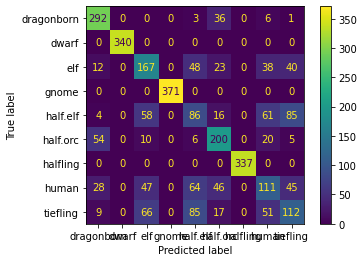

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#plt.figure(figsize=(80, 15))
cm = confusion_matrix(y_teste, saidas, labels = classes)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = classes)
disp.plot()
plt.show()